<h1>Machine Learning Assessment - EDA to Model Building</h1>

In [1]:

# ===========================
# 📦 1. Import Libraries
# ===========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib



<h1>2. Load Dataset</h1>

In [2]:


df = pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


<h1>3 EDA</h1>

In [3]:

print("Shape:", df.shape)
print("\nData Info:")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())

Shape: (545, 13)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None

Missing Values:
 price               0
area                0
bedrooms            0
bathrooms           0
stories       

In [4]:
# Check missing values
print("\nMissing Values:\n")
print(df.isnull().sum())


Missing Values:

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


<h1>4. Visualizations</h1>

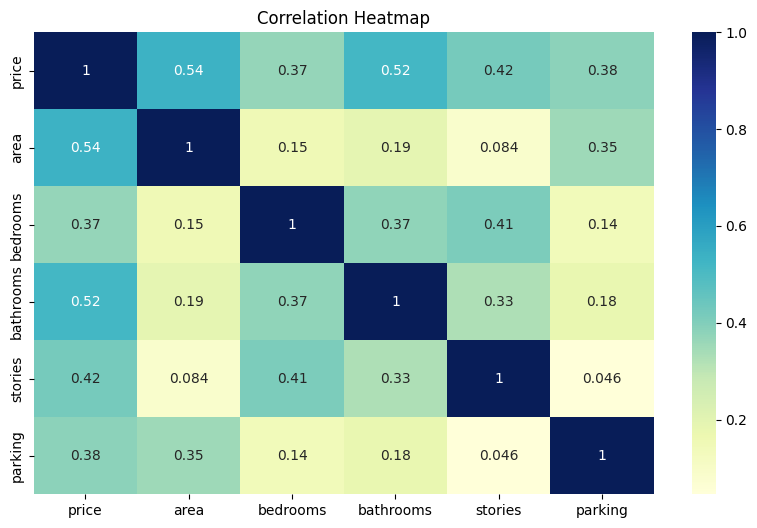

In [5]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()

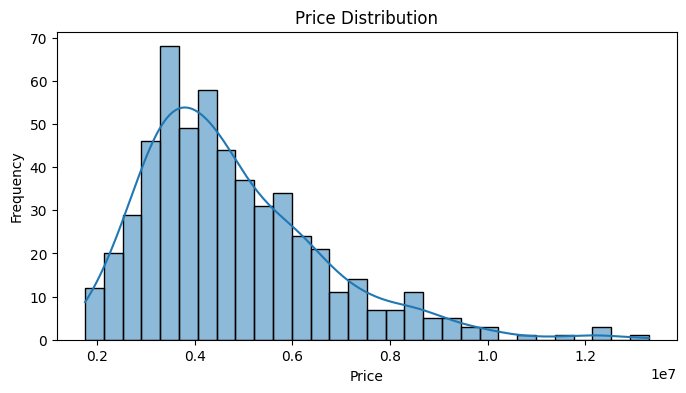

In [6]:
# Price distribution
plt.figure(figsize=(8,4))
sns.histplot(df['price'], bins=30, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

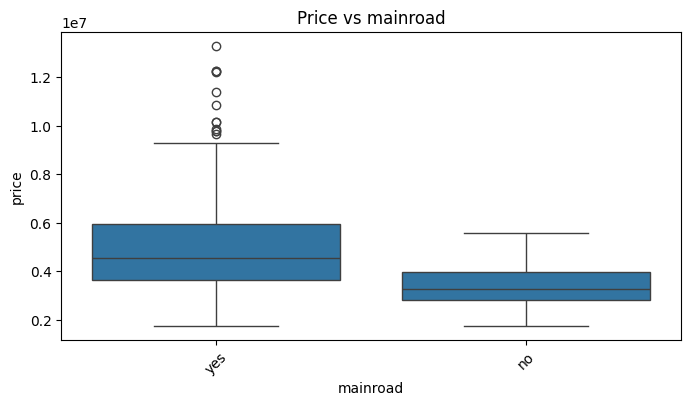

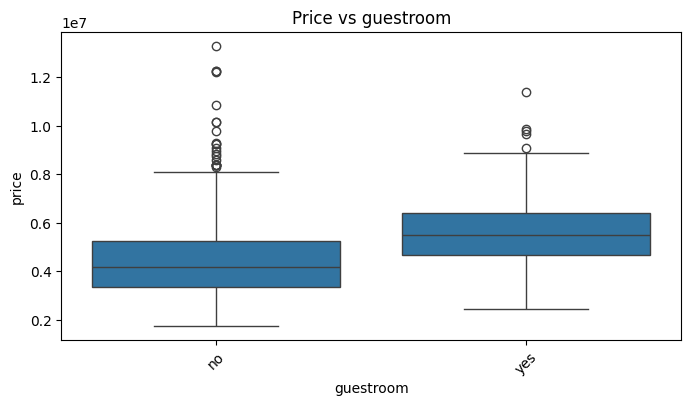

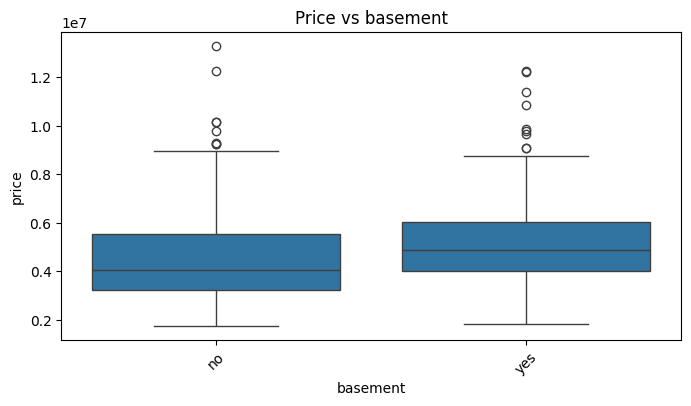

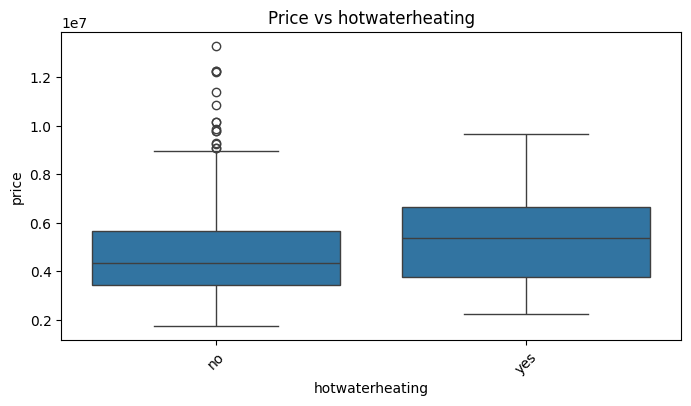

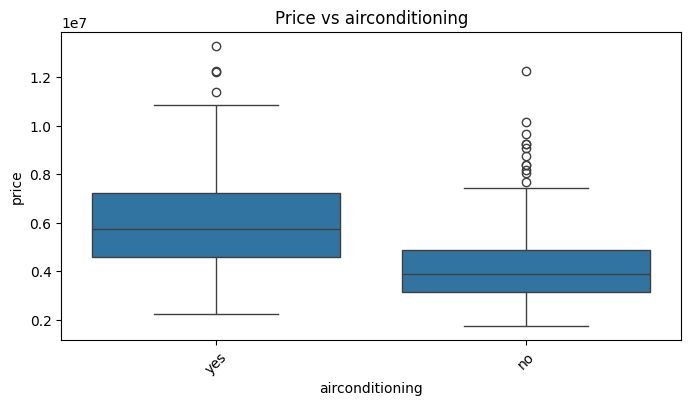

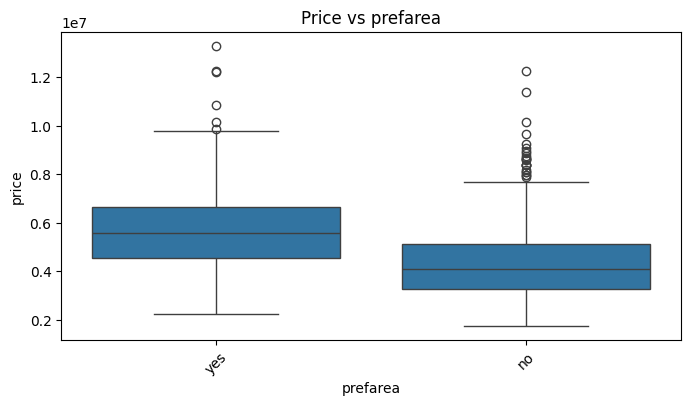

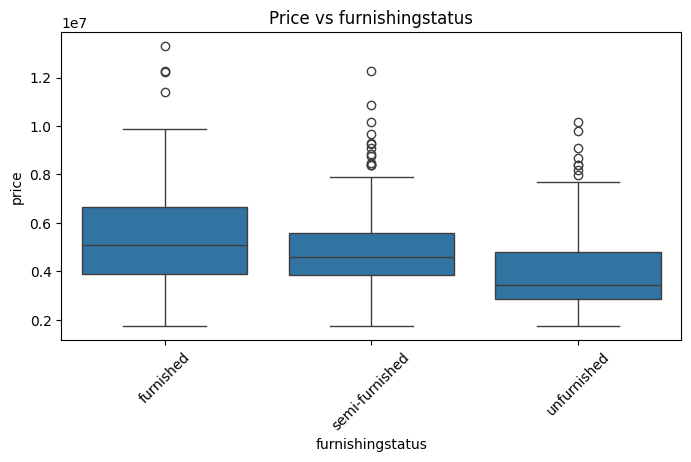

In [7]:
# Boxplots for categorical features
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
                        'airconditioning', 'prefarea', 'furnishingstatus']
for col in categorical_features:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=col, y='price', data=df)
    plt.title(f"Price vs {col}")
    plt.xticks(rotation=45)
    plt.show()

<h1>5 Encode categorical features</h1>

In [8]:

label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoder for Flask use

In [9]:
# Features and Target
X = df.drop("price", axis=1)
y = df["price"]

In [10]:
# Scale features
scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [11]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

<h1>6. Model Training</h1>

In [12]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [13]:
# Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [14]:
# XGBoost
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

<h1>7. Model Evaluation</h1>

In [15]:
def evaluate_model(name, y_test, y_pred):
    print(f"\n📈 {name} Performance:")
    print("MAE :", mean_absolute_error(y_test, y_pred))
    print("MSE :", mean_squared_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R²  :", r2_score(y_test, y_pred))

evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("XGBoost", y_test, y_pred_xgb)


📈 Linear Regression Performance:
MAE : 979679.6912959907
MSE : 1771751116594.0408
RMSE: 1331071.4167895128
R²  : 0.6494754192267793

📈 Random Forest Performance:
MAE : 1017351.8308868502
MSE : 1967970838082.71
RMSE: 1402843.8395212456
R²  : 0.6106551611385698

📈 XGBoost Performance:
MAE : 1062316.125
MSE : 2032404398080.0
RMSE: 1425624.21348685
R²  : 0.597907543182373


In [18]:
# Save the Linear Regression model 
feature_names = list(X.columns)
joblib.dump(feature_names, "feature_names.pkl")
joblib.dump(lr, "model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(label_encoders, "label_encoders.pkl")



['label_encoders.pkl']